---

## 👥 **Crédits**

Ce projet a été réalisé par :  
- **Aymen Kadri**  
- **Ismail Laghzaoui**  
- **Bushra Hossain**

---



# PCA 

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import prince
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# Chargement du jeu de données
gym_df = pd.read_csv('gym.csv')

# Préparation des données pour PCA
X_pca = gym_df.drop(columns=['Gender', 'Workout_Type', 'Workout_Frequency (days/week)', 'Experience_Level'])
y_gender = gym_df['Gender']
y_workout = gym_df['Workout_Type']

In [2]:
# Affichage des premières lignes des données traitées
X_pca.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),BMI
0,56,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,30.20
1,46,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,32.00
2,32,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,24.71
3,25,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,18.41
4,38,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,14.39


In [3]:
# Initialisation du modèle PCA avec prince
pca = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

# Ajustement du modèle PCA sur les données
pca_result = pca.fit_transform(X_pca)

# Création d'un DataFrame contenant les composantes principales
X_pca_df = pd.DataFrame(pca_result)
X_pca_df['Workout_Type'] = y_workout
X_pca_df['ID'] = X_pca.index

# Affichage des premières lignes
X_pca_df.head()


component,0,1,Workout_Type,ID
0,3.185039,-0.200149,Yoga,0
1,-1.091709,0.310806,HIIT,1
2,-1.784637,0.384779,Cardio,2
3,-2.479172,-0.120311,Strength,3
4,-2.079896,-0.461000,Strength,4


In [4]:
print(pca.eigenvalues_summary)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              2.927        26.61%                     26.61%
1              1.894        17.22%                     43.83%


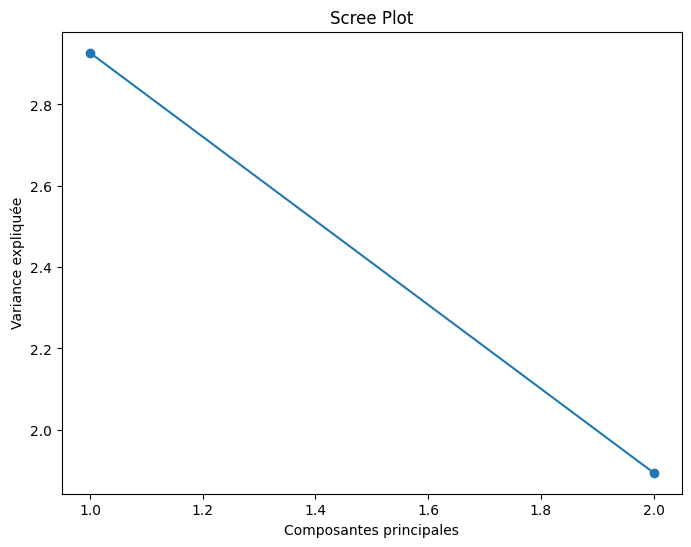

In [5]:
# Visualisation de la variance expliquée
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.eigenvalues_) + 1), pca.eigenvalues_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Composantes principales")
plt.ylabel("Variance expliquée")
plt.show()

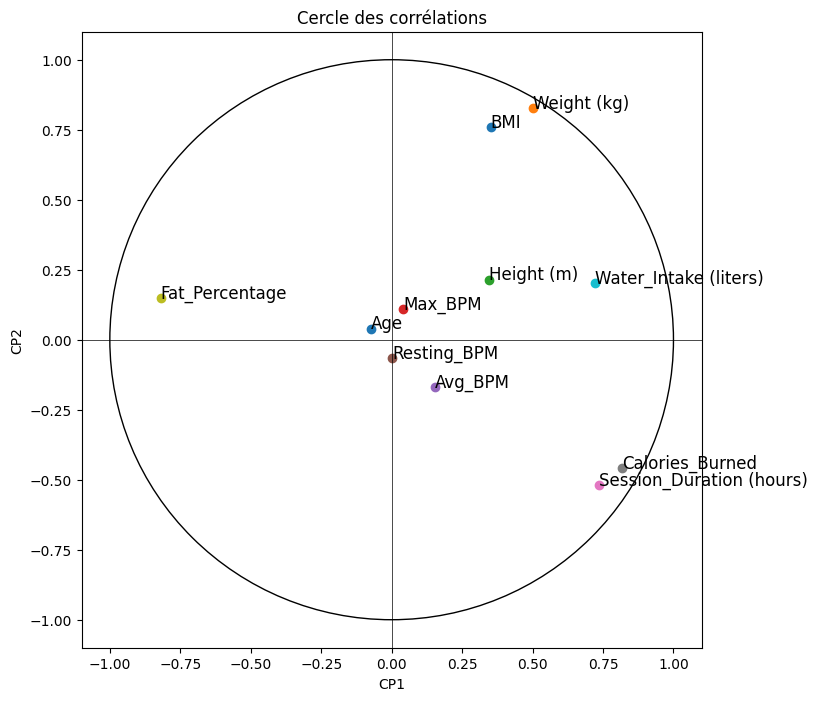

In [6]:
# Visualisation du cercle des corrélations
fig, ax = plt.subplots(figsize=(8, 8))

for i, (x, y) in enumerate(pca.column_correlations.values): 
    plt.scatter(x, y)
    plt.text(x, y, X_pca.columns[i], fontsize=12)

# Cercle unitaire
circle = plt.Circle((0, 0), 1, color='black', fill=False)
ax.add_artist(circle)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Cercle des corrélations')
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.show()


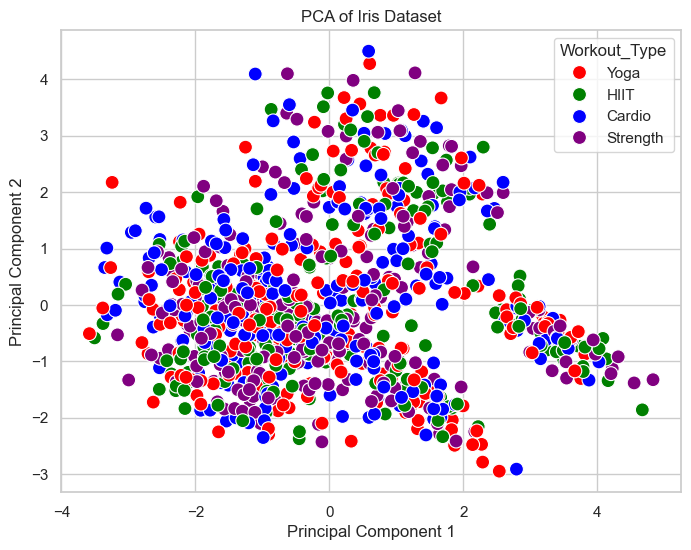

In [7]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=X_pca_df[0], y=X_pca_df[1],
    hue=X_pca_df['Workout_Type'],
    palette=['red','green','blue','purple'],
    s=100
)

for i in range(X_pca_df.shape[0]):
    plt.text(
        X_pca_df[0].iloc[i] + 0.02,
        X_pca_df[1].iloc[i],
        str(),
        fontsize=9
    )

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

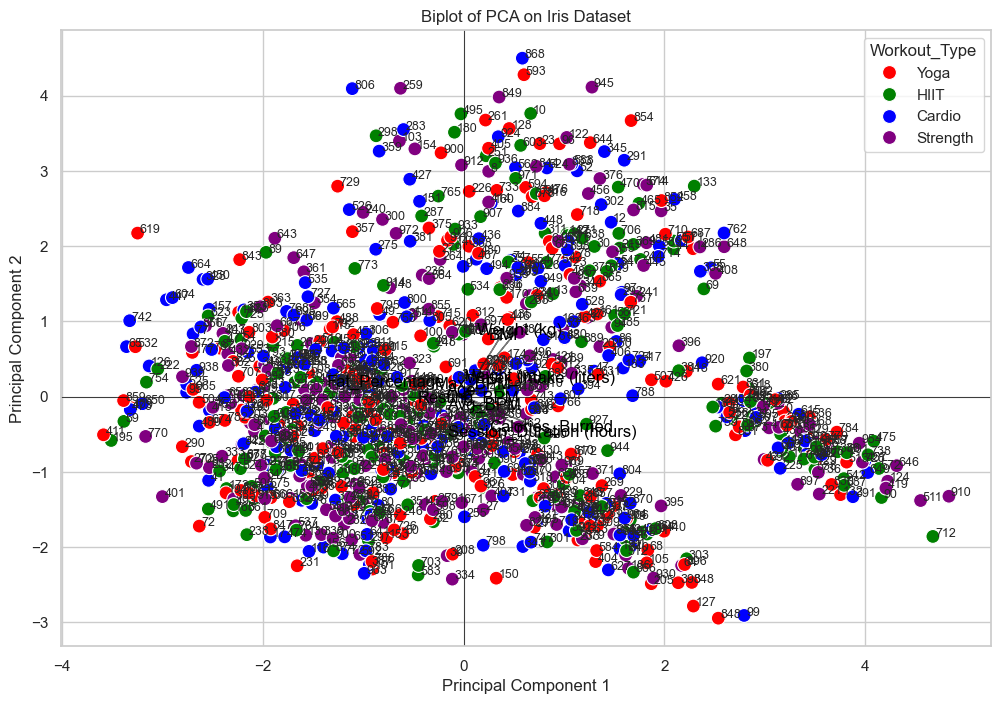

In [8]:
loadings = pca.column_correlations

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x=X_pca_df[0], y=X_pca_df[1],
    hue=X_pca_df['Workout_Type'],
    palette=['red','green','blue','purple'],
    s=100
)

for i in range(X_pca_df.shape[0]):
    plt.text(
        X_pca_df[0].iloc[i] + 0.02,
        X_pca_df[1].iloc[i],
        str(X_pca_df['ID'].iloc[i]),
        fontsize=9
    )

for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings.iloc[i, 0], loadings.iloc[i, 1],
              color='black', alpha=0.5, head_width=0.05, head_length=0.05)
    plt.text(loadings.iloc[i, 0] + 0.05, loadings.iloc[i, 1] + 0.05,
            X_pca.columns[i], color='black', ha='center', va='center', fontsize=12)

plt.title('Biplot of PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

In [9]:
pca.column_correlations

component,0,1
variable,,
Age,-0.073190,0.039516
Weight (kg),0.503233,0.827380
Height (m),0.345961,0.213864
Max_BPM,0.041855,0.108294
Avg_BPM,0.153914,-0.169059
Resting_BPM,0.000869,-0.065030
Session_Duration (hours),0.734417,-0.519737
Calories_Burned,0.818065,-0.458410
Fat_Percentage,-0.819342,0.147422


# Binning

In [10]:
# On crée ici un binned dataset pour pouvoir appliquer la mca 

binned_df = gym_df.copy()
binned_df['Gender'] = y_gender
binned_df['Age'] = pd.qcut(binned_df['Age'], q=3, labels=['Young', 'Adult', 'Senior'])
binned_df['Weight (kg)'] = pd.cut(binned_df['Weight (kg)'], bins=3, labels=['Low', 'Medium', 'High'])
binned_df['Height (m)'] = pd.cut(binned_df['Height (m)'], bins=3, labels=['Short', 'Average', 'Tall'])
binned_df['Max_BPM'] = pd.cut(binned_df['Max_BPM'], bins=3, labels=['Low', 'Medium', 'High'])
binned_df['Avg_BPM'] = pd.cut(binned_df['Avg_BPM'], bins=3, labels=['Low', 'Medium', 'High'])
binned_df['Resting_BPM'] = pd.cut(binned_df['Resting_BPM'], bins=3, labels=['Low', 'Normal', 'High'])
binned_df['Session_Duration (hours)'] = pd.cut(binned_df['Session_Duration (hours)'], bins=3, labels=['Short', 'Medium', 'Long'])
binned_df['Calories_Burned'] = pd.cut(binned_df['Calories_Burned'], bins=3, labels=['Low', 'Medium', 'High'])
binned_df['Fat_Percentage'] = pd.cut(binned_df['Fat_Percentage'], bins=3, labels=['Low', 'Normal', 'High'])
binned_df['Water_Intake (liters)'] = pd.cut(binned_df['Water_Intake (liters)'], bins=3, labels=['Low', 'Medium', 'High'])
binned_df['BMI'] = pd.cut(binned_df['BMI'], bins=3, labels=['Underweight', 'Normal', 'Overweight'])

binned_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,Senior,Male,Medium,Average,Medium,High,Normal,Long,High,Yoga,Low,High,4,3,Normal
1,Adult,Female,Medium,Short,Medium,Medium,Normal,Medium,Medium,HIIT,High,Low,4,2,Normal
2,Young,Female,Low,Short,Low,Low,Low,Medium,Low,Cardio,High,Medium,4,2,Underweight
3,Young,Male,Low,Average,High,High,Low,Short,Low,Strength,High,Low,3,1,Underweight
4,Adult,Male,Low,Average,High,High,High,Short,Low,Strength,High,Medium,3,1,Underweight


# MCA

In [11]:
# MCA
mca_df = binned_df.copy()
mca_df = mca_df.drop(columns=['Workout_Type'])

mca = prince.MCA(n_components=2, n_iter=3, copy=True, check_input=True, engine= 'sklearn', random_state=42)

mca = mca.fit(mca_df)

mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.312,15.61%,15.61%
1,0.194,9.71%,25.33%


In [12]:
mca.column_coordinates(mca_df)

,0,1
Age__Young,0.062426,0.056965
Age__Adult,0.006138,-0.100277
Age__Senior,-0.075125,0.042466
Gender__Female,-0.219044,-0.883511
Gender__Male,0.198040,0.798791
Weight (kg)__Low,-0.199695,-0.697595
Weight (kg)__Medium,0.437165,0.334846
Weight (kg)__High,-0.420967,1.638261
Height (m)__Short,-0.115634,-0.530271
Height (m)__Average,-0.073014,-0.042085


In [13]:
mca.plot(
    mca_df,
    x_component=0, 
    y_component=1,
    show_column_markers=True,
    show_row_markers=True,
    show_column_labels=False,
    show_row_labels=False)

alt.LayerChart(...)

In [14]:
mca.plot(
    mca_df,
    x_component=0,
    y_component=1,
    show_column_markers=True,  
    show_row_markers=False     
)

alt.LayerChart(...)

In [15]:
mca.row_cosine_similarities(mca_df)

,0,1
0,0.516266,0.013156
1,0.015973,0.081740
2,0.061215,0.193351
3,0.122808,0.001187
4,0.085571,0.000069
...,...,...
968,0.539421,0.016653
969,0.007671,0.061185
970,0.175310,0.080796
971,0.052942,0.085690


# CA 

In [16]:
ca_df = binned_df[['Weight (kg)', 'Workout_Type']].copy()
ca_df['Weight (kg)'] = pd.cut(gym_df['Weight (kg)'], bins=10, labels=[
    'Very Low', 'Low', 'Below Average', 'Average', 'Above Average', 'High', 'Very High', 
    'Extremely High', 'Obese', 'Severely Obese'
])
ca_df.head()

,Weight (kg),Workout_Type
0,High,Yoga
1,Average,HIIT
2,Average,Cardio
3,Low,Strength
4,Very Low,Strength


In [17]:
contingency_table = pd.crosstab(ca_df['Weight (kg)'], ca_df['Workout_Type'])
contingency_table

Workout_Type,Cardio,HIIT,Strength,Yoga
Weight (kg),,,,
Very Low,21,19,23,24
Low,33,30,49,38
Below Average,57,46,51,45
Average,44,36,43,37
Above Average,29,30,30,28
High,22,19,27,29
Very High,14,14,10,10
Extremely High,16,11,6,8
Obese,10,8,5,10


In [18]:
# Convertir la table de contingence en DataFrame dense
contingency_table = contingency_table.astype(float)

# Appliquer l’Analyse des Correspondances
ca = prince.CA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
ca = ca.fit(contingency_table)

In [19]:
print(ca.eigenvalues_summary)
print(ca.total_inertia_)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.015        77.21%                     77.21%
1              0.003        16.50%                     93.71%
0.01947139277482071


In [20]:

row_coords = ca.row_coordinates(contingency_table)

col_coords = ca.column_coordinates(contingency_table)


print(row_coords.head())
print(col_coords.head())

                      0         1
Weight (kg)                      
Very Low      -0.044647  0.060158
Low           -0.153902 -0.028109
Below Average  0.052450 -0.032076
Average        0.015632 -0.030769
Above Average  0.021253 -0.006839
                     0         1
Workout_Type                    
Cardio        0.139557 -0.016342
HIIT          0.095018 -0.017637
Strength     -0.161615 -0.056758
Yoga         -0.062298  0.095015


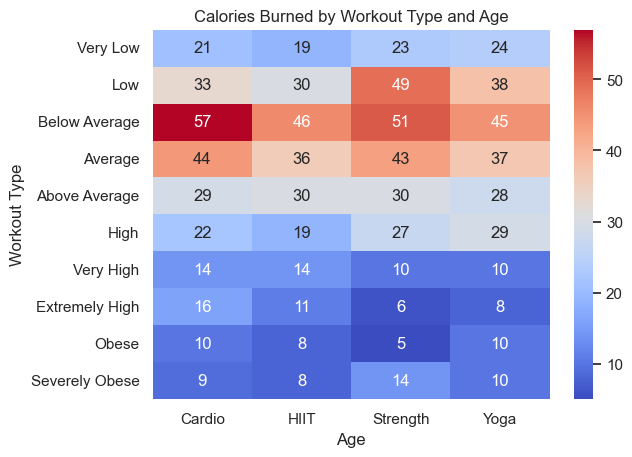

In [21]:
sns.heatmap(contingency_table, annot=True, fmt=".0f", cmap="coolwarm")
plt.title("Calories Burned by Workout Type and Age")
plt.xlabel("Age")
plt.ylabel("Workout Type")
plt.show()

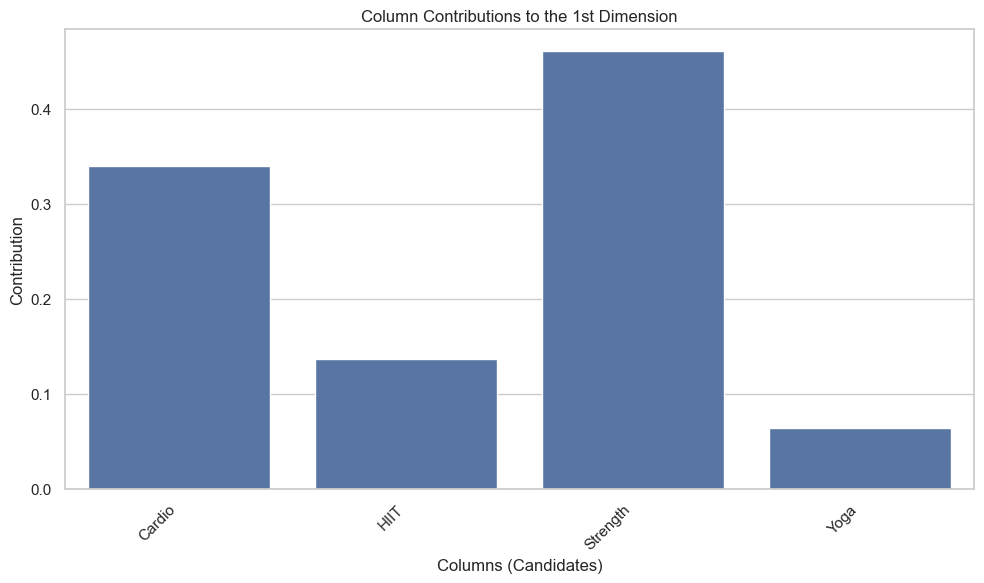

In [22]:
column_contributions = ca.column_contributions_

contrib_df = column_contributions.iloc[:,0]

plt.figure(figsize=(10,6))
sns.barplot(x=contrib_df.index, y=contrib_df.values)
plt.title('Column Contributions to the 1st Dimension')
plt.xlabel('Columns (Candidates)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

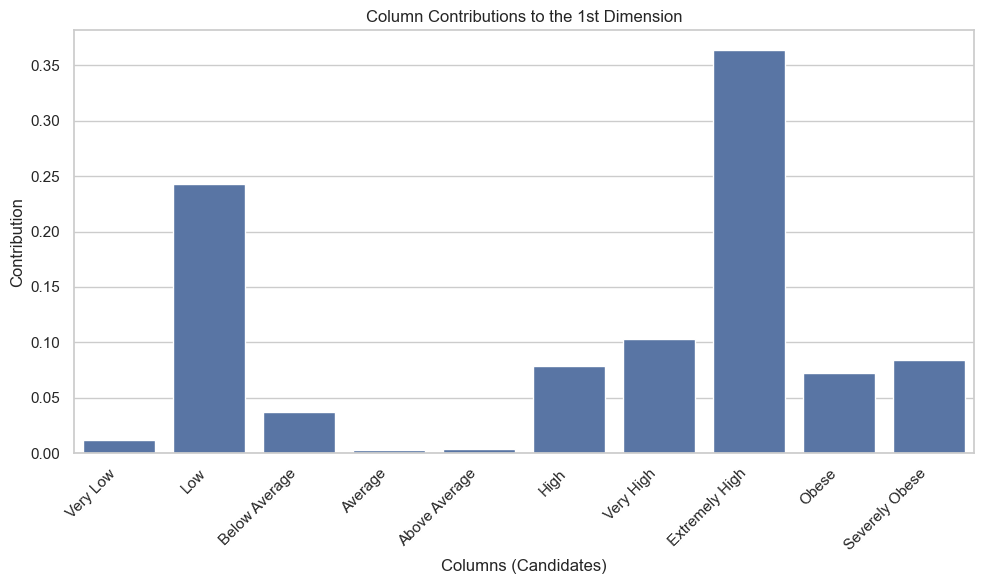

In [23]:
row_constributions = ca.row_contributions_

contrib_df = row_constributions.iloc[:,0]

plt.figure(figsize=(10,6))
sns.barplot(x=contrib_df.index, y=contrib_df.values)
plt.title('Column Contributions to the 1st Dimension')
plt.xlabel('Columns (Candidates)')
plt.ylabel('Contribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# FAMD

In [24]:

import matplotlib.pyplot as plt

famd_df = gym_df.copy()
famd_df['Gender'] = y_gender
famd_df['Age'] = pd.qcut(famd_df['Age'], q=3, labels=['Young', 'Adult', 'Senior'])
famd_df['Weight (kg)'] = pd.cut(famd_df['Weight (kg)'], bins=3, labels=['Low', 'Medium', 'High'])
famd_df['Height (m)'] = pd.cut(famd_df['Height (m)'], bins=3, labels=['Short', 'Average', 'Tall'])
famd_df['Max_BPM'] = pd.cut(famd_df['Max_BPM'], bins=3, labels=['Low', 'Medium', 'High'])
famd_df['Avg_BPM'] = pd.cut(famd_df['Avg_BPM'], bins=3, labels=['Low', 'Medium', 'High'])
famd_df['Resting_BPM'] = pd.cut(famd_df['Resting_BPM'], bins=3, labels=['Low', 'Normal', 'High'])
famd_df['Session_Duration (hours)'] = pd.cut(famd_df['Session_Duration (hours)'], bins=3, labels=['Short', 'Medium', 'Long'])
famd_df['Calories_Burned'] = pd.cut(famd_df['Calories_Burned'], bins=3, labels=['Low', 'Medium', 'High'])
famd_df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,Senior,Male,Medium,Average,Medium,High,Normal,Long,High,Yoga,12.6,3.5,4,3,30.20
1,Adult,Female,Medium,Short,Medium,Medium,Normal,Medium,Medium,HIIT,33.9,2.1,4,2,32.00
2,Young,Female,Low,Short,Low,Low,Low,Medium,Low,Cardio,33.4,2.3,4,2,24.71
3,Young,Male,Low,Average,High,High,Low,Short,Low,Strength,28.8,2.1,3,1,18.41
4,Adult,Male,Low,Average,High,High,High,Short,Low,Strength,29.2,2.8,3,1,14.39


In [25]:

famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn'
)


famd = famd.fit(famd_df)


transformed_data = famd.transform(famd_df)


famd.plot(
    famd_df,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

In [26]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,20.956,13.70%,13.70%
1,14.321,9.36%,23.06%


# 🏁 **CONCLUSION**

---

## 🌟 **PCA (Analyse en Composantes Principales)**

### 🔍 **Interprétation des composantes ou dimensions :**
Les composantes principales résultent de la transformation linéaire des données initiales, visant à **maximiser la variance expliquée**.  
Les deux premières composantes principales extraites ici expliquent **43,83 % de la variance totale**.  
Elles résument les relations linéaires entre des variables comme :
- **Poids**
- **Durée des séances**
- **Calories brûlées**  
Cela offre une vision simplifiée des données tout en conservant leur structure principale.

### ⚖️ **Forces et limites :**
**Forces** :
- Idéale pour réduire la **dimensionnalité**.
- Identifie les variables ayant le plus d'impact sur la variance globale.  

**Limites** :
- Ne capte pas les **relations non linéaires** entre les variables.
- Dépend fortement de la **standardisation préalable** des données.  
Ainsi, des informations clés peuvent être perdues dans des cas de structure complexe.

---

## 🌟 **MCA (Analyse des Correspondances Multiples)**

### 🔍 **Interprétation des dimensions :**
Les dimensions en MCA révèlent des relations entre les **modalités des variables catégoriques**.  
Par exemple :
- Des catégories comme **"Poids faible"** ou **"Calories brûlées élevées"** sont positionnées selon leur corrélation sur les axes.  
Cela permet d'observer des **regroupements** ou **oppositions significatives**.  
Les deux premières dimensions expliquent **25,33 % de l'inertie totale**, mettant en évidence les associations dominantes.

### ⚖️ **Forces et limites :**
**Forces** :
- Capacité à analyser des **données catégoriques**.
- Représentation visuelle intuitive des correspondances.

**Limites** :
- Interprétation complexe si le nombre de modalités est élevé.
- Moins adaptée pour des données continues.

---

## 🌟 **CA (Analyse des Correspondances)**

### 🔍 **Interprétation des dimensions :**
Les dimensions en CA sont dérivées de la **table de contingence** entre variables catégoriques.  
- Le premier axe, expliquant **77,21 % de la variance**, met en évidence les liens significatifs.
- Par exemple :  
  Les types d’entraînement comme **"Yoga"** ou **"Cardio"** peuvent être associés à différentes catégories de poids.

### ⚖️ **Forces et limites :**
**Forces** :
- Utile pour explorer des **relations bidimensionnelles** dans des données tabulaires.

**Limites** :
- Risque de perte d’information si les données sont trop disparates.
- Nécessite une expertise pour éviter des **conclusions hâtives**.

---

## 🌟 **FAMD (Analyse des Données Mixtes)**

### 🔍 **Interprétation des dimensions :**
La FAMD équilibre l’impact des variables **catégoriques** et **continues**.  
- Le premier axe explique **13,7 % de la variance**.  
Par exemple :  
Les variables comme **"BMI"** ou **"Genre"** influencent conjointement la position des observations.

### ⚖️ **Forces et limites :**
**Forces** :
- Idéale pour des jeux de données **mixtes**.
- Offre une représentation **équilibrée** et pertinente.

**Limites** :
- Calcul complexe avec des **datasets volumineux**.
- Nécessite un effort supplémentaire pour sélectionner les variables significatives et éviter les biais.

---


# 🏁 **Synthèse des Méthodes d'Analyse de Données**

---

## 🌟 **PCA (Analyse en Composantes Principales)**

### 🔍 **Description :**
- **Données traitées :** Variables continues.  
- **Variance expliquée :**  
  - **Première composante** : 26,61 %  
  - **Seconde composante** : 17,22 %  
  - **Total (2 premières composantes)** : **43,83 %**  

👉 Une part significative de l'information est capturée par un petit nombre de dimensions, permettant une simplification efficace.

---

## 🌟 **MCA (Analyse des Correspondances Multiples)**

### 🔍 **Description :**
- **Données traitées :** Variables catégoriques.  
- **Inertie expliquée :**  
  - **Première dimension** : 15,61 %  
  - **Seconde dimension** : 9,71 %  
  - **Total (2 premières dimensions)** : **25,33 %**  

👉 Bien que la proportion d'inertie expliquée soit plus faible que la PCA, la MCA est adaptée à des données catégoriques souvent moins riches en information brute.

---

## 🌟 **CA (Analyse des Correspondances)**

### 🔍 **Description :**
- **Données traitées :** Tableaux croisés (relations entre variables catégoriques).  
- **Inertie expliquée :**  
  - **Première dimension** : 77,21 %  
  - **Seconde dimension** : 16,50 %  
  - **Total (2 premières dimensions)** : **93,71 %**  

👉 La CA excelle à capturer une grande proportion de l'inertie dans des contextes bidimensionnels, mais reste limitée à ce type d’analyse.

---

## ✨ **Synthèse Comparative**

| **Méthode** | **Type de données**           | **Variance/Inertie expliquée**     | **Forces**                                      | **Limites**                                  |
|-------------|-------------------------------|-------------------------------------|------------------------------------------------|---------------------------------------------|
| **PCA**     | Variables continues           | **43,83 % (2 premières composantes)** | Réduction efficace de la dimensionnalité.      | Moins adaptée pour les relations non linéaires. |
| **MCA**     | Variables catégoriques        | **25,33 % (2 premières dimensions)** | Analyse intuitive des correspondances.         | Faible inertie expliquée, difficile à interpréter avec de nombreuses modalités. |
| **CA**      | Tableaux croisés (catégoriques) | **93,71 % (2 premières dimensions)** | Capte efficacement l’information dans des relations bidimensionnelles. | Limité aux tableaux de contingence.         |

---

## 🎯 **Conclusion**
- **PCA** : Appropriée pour capturer une variance modérée dans des données continues.  
- **MCA** : Moins performante en termes de variance expliquée, mais idéale pour analyser des données catégoriques complexes.  
- **CA** : Très performante pour des tableaux croisés, mais son champ d’application est restreint.  

### 🧩 **Choix méthodologique :**
L'efficacité d'une méthode dépend du **type de données** et de l'**objectif d'analyse** :
- Pour des **données continues** : **PCA**.  
- Pour des **données catégoriques** : **MCA** ou **CA** selon le contexte.  
